# Predicting the Google Stock Price using the Facebook Prophet Model.

Facebook Prophet is an algorithm developed by Facebook’s Core Data Science team. It is used in the applications of time series forecasting, particularly when there is a high probability of seasonal effects. 

- The data for this project can be downloaded at: https://finance.yahoo.com/quote/GOOG/history/?period1=1092922200&period2=1722709156
- Documentation on the Prophet package and related functions is available at: https://facebook.github.io/prophet/docs/quick_start.html

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import warnings
import prophet

In [21]:
data = pd.read_csv("GOOG.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512


**Visualise the Time Series Stock Data**

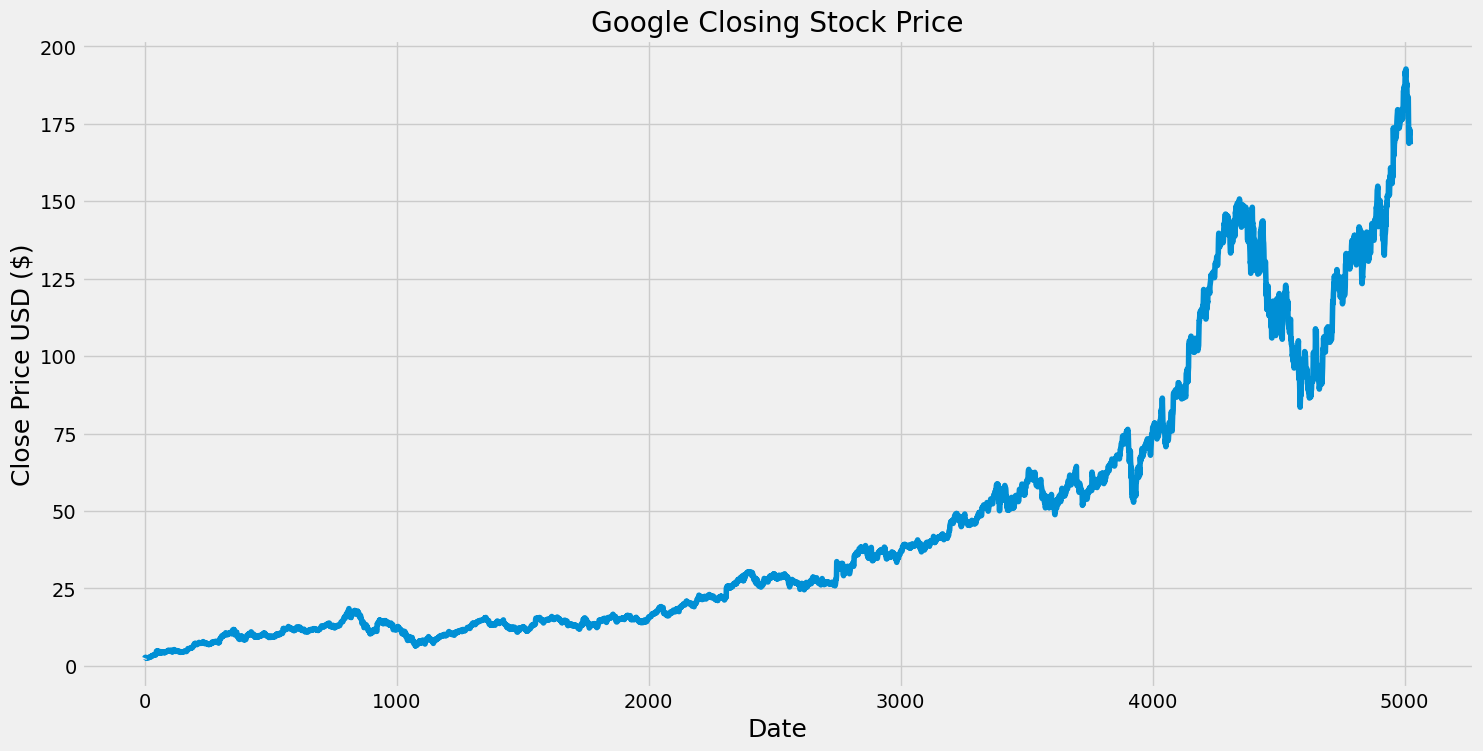

In [22]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))
plt.title("Google Closing Stock Price")
plt.plot(data["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

The data is clearly non-stationary, and non-linear. Prophet is well suited for such trends, while alternatives like ARIMA might struggle. 

We subset the broader dataset to only the close price and date; the only features necessary for this analysis. 

In [23]:
data = data[["Date","Close"]] 
data = data.rename(columns = {"Date":"ds","Close":"y"}) # Necessary reformatting
data.head()

,ds,y
0,2004-08-19,2.499133
1,2004-08-20,2.697639
2,2004-08-23,2.724787
3,2004-08-24,2.611960
4,2004-08-25,2.640104


**Fitting the Model**

15:46:29 - cmdstanpy - INFO - Chain [1] start processing
python(21206) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
15:46:30 - cmdstanpy - INFO - Chain [1] done processing
/Users/alexandredore/opt/anaconda3/envs/envGEOG0178/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/alexandredore/opt/anaconda3/envs/envGEOG0178/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.'

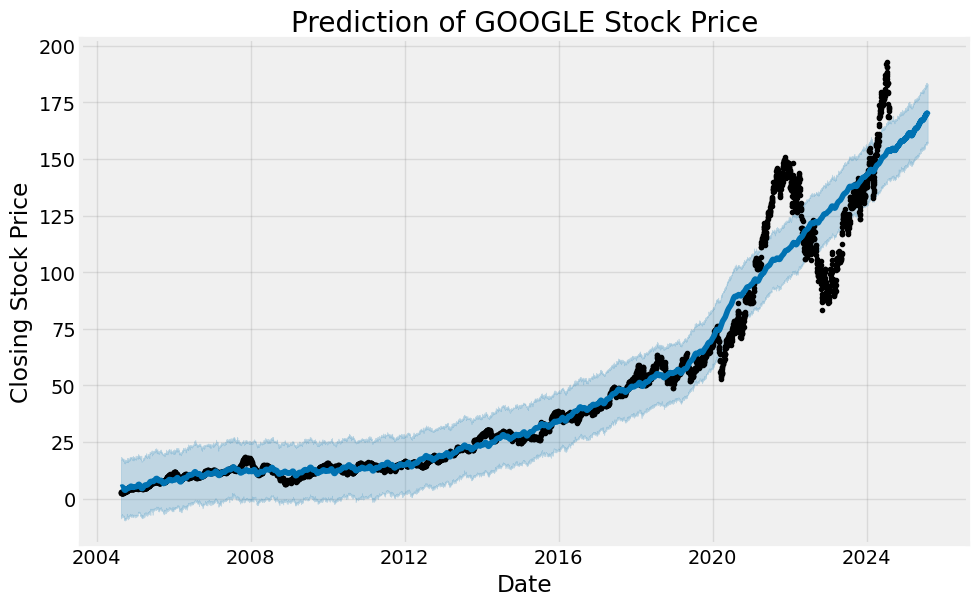

In [24]:
from prophet import Prophet 
m = Prophet(daily_seasonality=True) # daily_seasonality means the model will account for daily patterns in the data.
m.fit(data)

future = m.make_future_dataframe(periods=365) # 'periods=365' indicates that the model should predict values for the next 365 days.

predictions=m.predict(future) # using the resulting model to make predictions, stored in the predictions data frame
m.plot(predictions)
plt.title("Prediction of GOOGLE Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

**Investigating Seasonal Effects**

/Users/alexandredore/opt/anaconda3/envs/envGEOG0178/lib/python3.9/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/alexandredore/opt/anaconda3/envs/envGEOG0178/lib/python3.9/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/alexandredore/opt/anaconda3/envs/envGEOG0178/lib/python3.9/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will

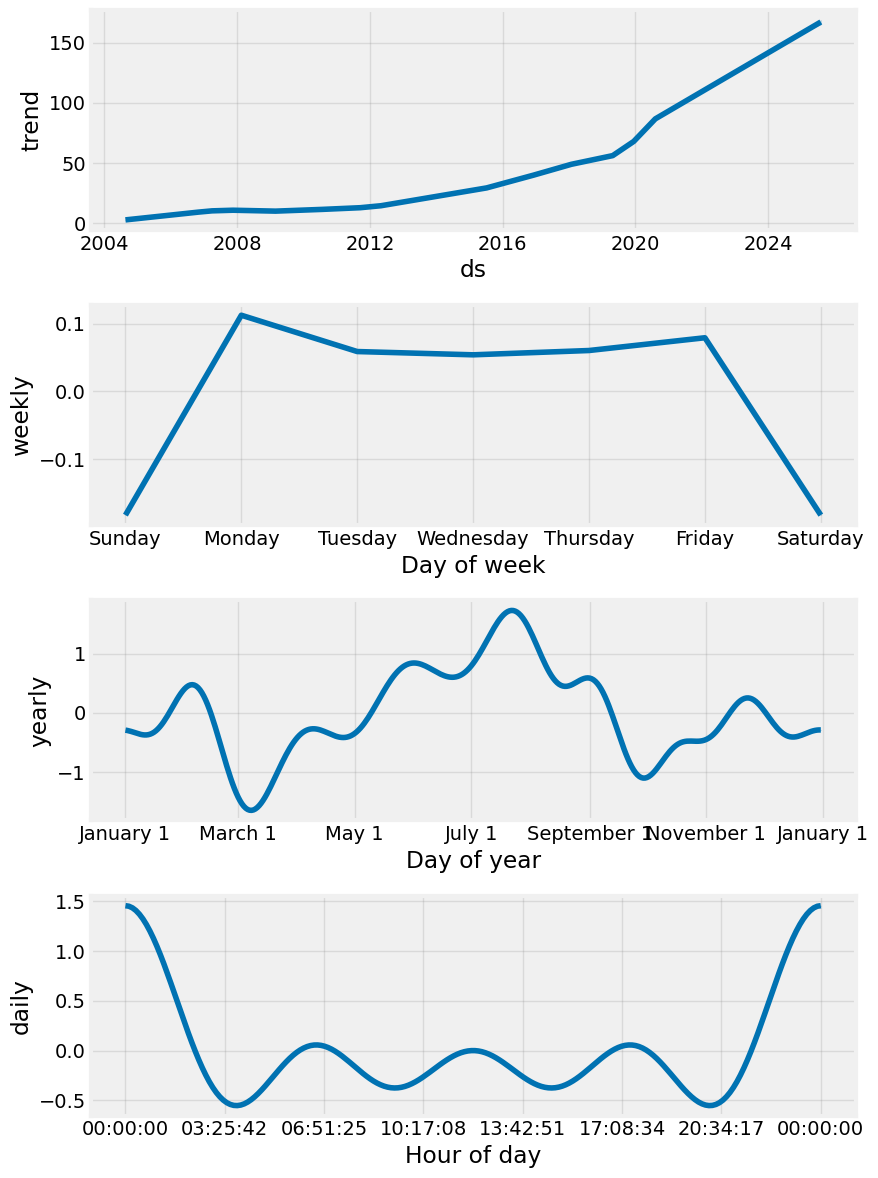

In [25]:
m.plot_components(predictions)
plt.show()

# Testing the Model to Predict the Nvidia Stock

In [28]:
data_nvda = pd.read_csv("NVDA.csv")
data_nvda.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000


**Visualising the Closing Stock Price Data**

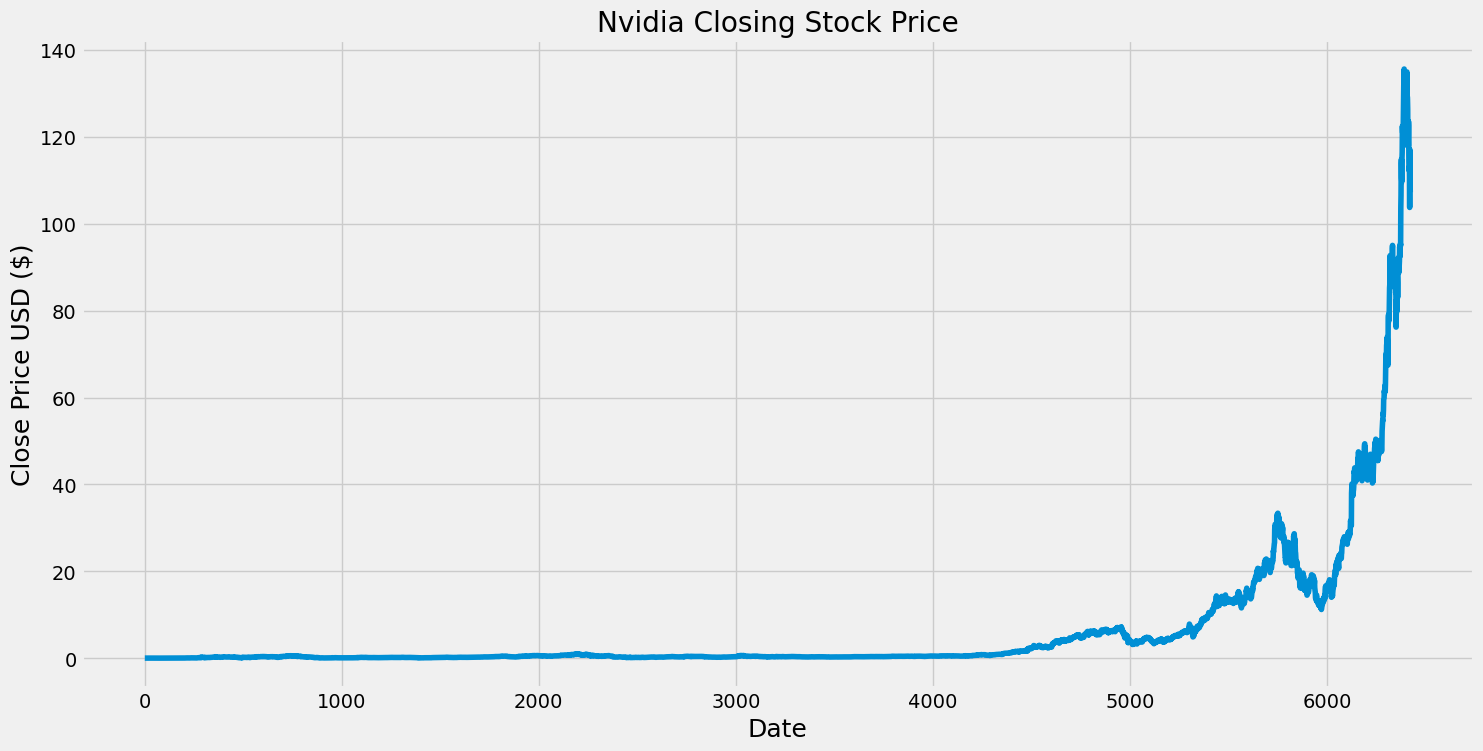

In [29]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))
plt.title("Nvidia Closing Stock Price")
plt.plot(data_nvda["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

Very volatile in recent periods.

**Subsetting to Relevant Variables**

In [31]:
data_nvda = data_nvda[["Date","Close"]] 
data_nvda = data_nvda.rename(columns = {"Date":"ds","Close":"y"}) # Necessary reformatting
data_nvda.head()

,ds,y
0,1999-01-22,0.041016
1,1999-01-25,0.045313
2,1999-01-26,0.041797
3,1999-01-27,0.041667
4,1999-01-28,0.041536


**Running the Model**

15:53:38 - cmdstanpy - INFO - Chain [1] start processing
python(21566) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
15:53:40 - cmdstanpy - INFO - Chain [1] done processing
/Users/alexandredore/opt/anaconda3/envs/envGEOG0178/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/alexandredore/opt/anaconda3/envs/envGEOG0178/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.'

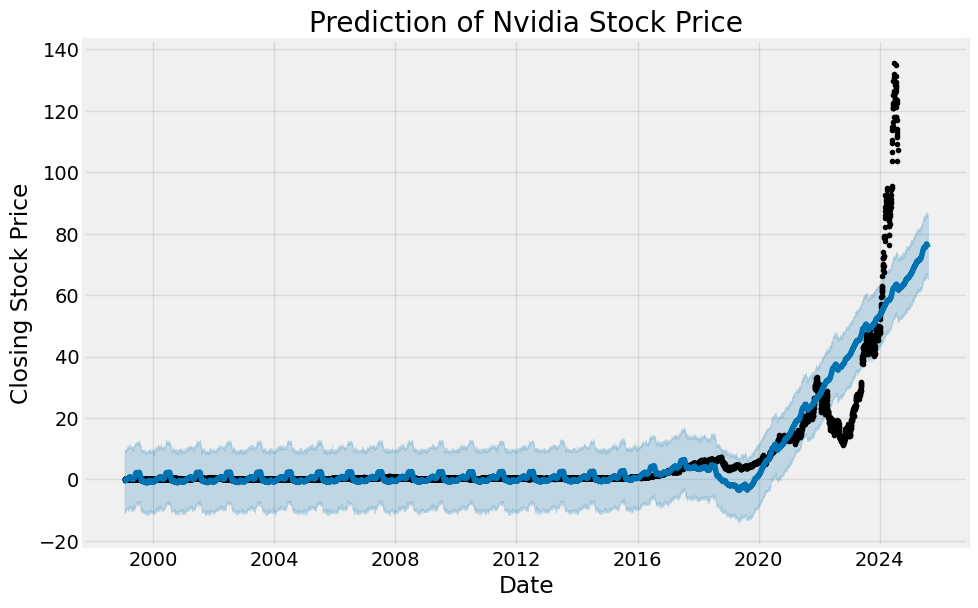

In [32]:

m = Prophet(daily_seasonality=True) # daily_seasonality means the model will account for daily patterns in the data.
m.fit(data_nvda)

future = m.make_future_dataframe(periods=365) # 'periods=365' indicates that the model should predict values for the next 365 days.

predictions=m.predict(future) # using the resulting model to make predictions, stored in the predictions data frame
m.plot(predictions)
plt.title("Prediction of Nvidia Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

/Users/alexandredore/opt/anaconda3/envs/envGEOG0178/lib/python3.9/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/alexandredore/opt/anaconda3/envs/envGEOG0178/lib/python3.9/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/alexandredore/opt/anaconda3/envs/envGEOG0178/lib/python3.9/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will

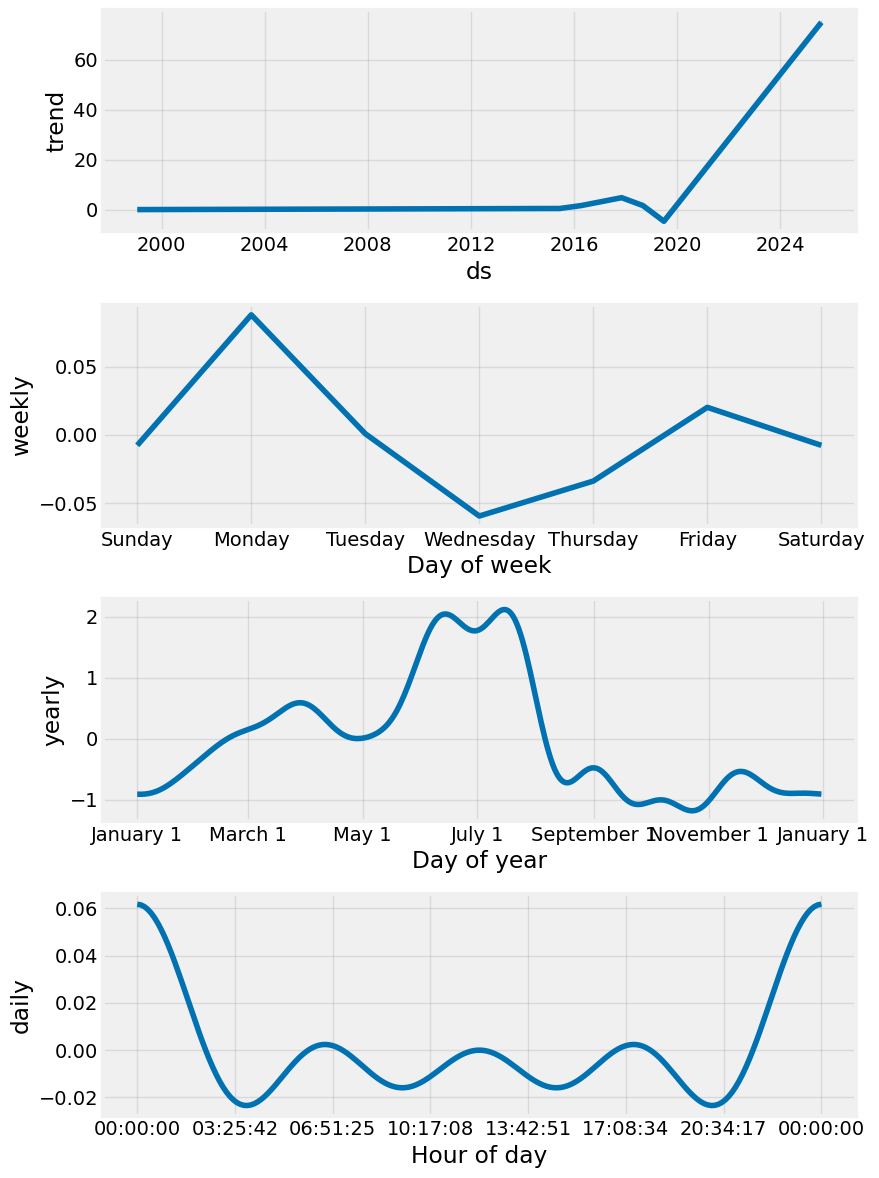

In [33]:
m.plot_components(predictions)
plt.show()

Interestingly, the trends are quite different from those of the Google stock.